In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Dataets and models
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.model_selection import cross_validate
#from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
# Supress classification warnings to show genetic statistics
import warnings
# Save and load files
import datetime
import pandas as pd
from google.colab import drive # Mount the Google drive
from google.colab import files # Save the experimental results to the Google drive 
import sys

In [ ]:
drive.mount('/content/drive')
#%cd '/content/drive/MyDrive/EEG/'
sys.path.append('/content/drive/MyDrive/EEG')
# import genetic_binary_kBest 
from genetic_binary_kBest import one_cls, create_population, cross_mutate, offspring_evaluate, population_sort, update_score_stat, save_population, print_statistics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


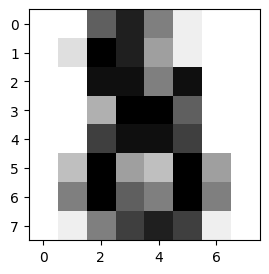

In [ ]:
# The Digit Dataset 1797 8x8 images 
digits = datasets.load_digits()
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [ ]:
nameFeatures = ('FEA 1', 'FEA 2', 'FEA 3', 'FEA 4', 'FEA 5', 'FEA 6', 'FEA 7', 'FEA 8', 'FEA 9', 'FEA 10', 'FEA 11', 'FEA 12', 'FEA 13', 'FEA 14', 'FEA 15', 'FEA 16', 'FEA 17', 'FEA 18', 'FEA 19', 'FEA 20', 'FEA 21', 'FEA 22', 'FEA 23', 'FEA 24', 'FEA 25', 'FEA 26', 'FEA 27', 'FEA 28', 'FEA 29', 'FEA 30', 'FEA 31', 'FEA 32', 'FEA 33', 'FEA 34', 'FEA 35', 'FEA 36', 'FEA 37', 'FEA 38', 'FEA 39', 'FEA 40', 'FEA 41', 'FEA 42', 'FEA 43', 'FEA 44', 'FEA 45', 'FEA 46', 'FEA 47', 'FEA 48', 'FEA 49', 'FEA 50', 'FEA 51', 'FEA 52', 'FEA 53', 'FEA 54', 'FEA 55', 'FEA 56', 'FEA 57', 'FEA 58', 'FEA 59', 'FEA 60', 'FEA 61', 'FEA 62', 'FEA 63', 'FEA 64')
# Load dataset
X = digits.data
Y = digits.target
clf = LogisticRegression(C=0.05)
# Run one-time classification on the whole dataset
#one_cls(X, Y, clf)

In [ ]:
# Main part of genetic search
n_Features = len(nameFeatures)
# Genetic algorithm metaparameters
K_BEST = 12      # Number of resulting features 
M_BEST = 3      # Number of rhe best models
POP_SIZE = 14   # Number of variuos models min = M_BEST
MUT_PROB = 2*1/K_BEST  # Chance of mutation for each feature
MAX_ITER = 100   # Times POP_SIZE equals number of fits
# ---
# Statistics each round for the best one and the population
topM_score = np.zeros(M_BEST)
topM_feat  = np.zeros([M_BEST,n_Features])
# ---
# Main loop of the genetic algorithm
population, scores  = create_population(n_Features, POP_SIZE, K_BEST)


In [ ]:
for i in range(MAX_ITER):
  offspring           = cross_mutate(population, n_Features, MUT_PROB)
  scores_offspring    = offspring_evaluate(X,Y, clf, offspring)
  population, scores  = population_sort(population, offspring, scores, scores_offspring)
  topM_score, topM_feat = update_score_stat(population, scores, topM_score, topM_feat)
  # save_population(population, scores)
  print(f'Iteration: {i}, score of best: {topM_score[1]}, features: {topM_feat[1,:]}')
  print(f'Scores: {scores}')
  # print_statistics(topM_feat[0, :], nameFeatures, K_BEST)
# Save and show results
save_population(population, scores)
print_statistics(topM_score[1,:], nameFeatures)